In [77]:
%matplotlib inline

In [78]:
import pandas as pd
import numpy as np

In [79]:
import fipy as fp

In [80]:
from matplotlibElPhFViewer import MatplotlibElPhFViewer
def viewElPhF(filename, L="3.2 nm", nx=1200):
    L = fp.Variable(L)
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx/L)

    xi = fp.CellVariable(mesh=mesh, name=r"$\xi$")
    phi = fp.CellVariable(mesh=mesh, name=r"$\phi$")  
    interstitials = [
        fp.CellVariable(mesh=mesh, name="$e^-$")
    ]

    substitutionals = [
        fp.CellVariable(mesh=mesh, name="$M^+$"),
        fp.CellVariable(mesh=mesh, name="$A^-$")
    ]

    N = fp.CellVariable(mesh=mesh, name="$N$")
    
    components = interstitials + substitutionals + [N]
    
    for j in components:
        j.Y = fp.CellVariable(mesh=mesh, name=j.name)

    interstitials[0].z   = -1
    substitutionals[0].z = +2
    substitutionals[1].z = -2
    N.z                  = 0

                         
    values = fp.numerix.loadtxt(filename, skiprows=1, unpack=True)
    
    xi.setValue(values[1])
    phi.setValue(values[2])
    
    _start = 3
    for j, mu in zip(interstitials + substitutionals,
                     values[_start:_start+len(interstitials + substitutionals)]):
        j.setValue(mu)

    _start = 3 + len(interstitials + substitutionals)
    for j, Y in zip(components,
                     values[_start:_start+len(components)]):
        j.Y.setValue(Y)

    charge = fp.CellVariable(mesh=mesh, value=N.z)
    for i in interstitials + substitutionals:
        charge += i.z * i.Y

    viewer = MatplotlibElPhFViewer(phase=xi,
                           potential=phi,
                           components=[i.Y for i in components],
                           charge=charge,
                           potentials=[i - i[...,0] for i in interstitials + substitutionals],
                           limits={
                               'phasemax':1.,
                               'phasemin':0.,
                           })


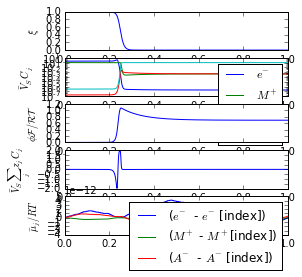

In [142]:
viewElPhF("0.0_V.tsv")

In [81]:
%%bash

smt configure --executable=python
smt configure --labelgenerator=uuid
smt configure --on-changed=store-diff
smt configure --addlabel=parameters


Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly
Multiple versions found, using /data/ame2/miniconda/envs/fipy/bin/python. If you wish to use a different version, please specify it explicitly


In [82]:
import json
import pandas
import os
import glob

In [83]:
!smt export
with open(".smt/records_export.json") as ff:
    data = json.load(ff)
    
df = pandas.DataFrame(data)

In [8]:
df[["label","outcome","parameters"]]

,label,outcome,parameters
0,7917bd4e77a0,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
1,03e056ad37b9,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
2,c7c5440dcd61,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
3,d2776d668f21,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
4,0b6d2adfd09f,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
5,1dfaa30a517e,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
6,dbfc7438f67e,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
7,47d9c95d87bb,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
8,01af157dc3a7,,"{u'content': u'{ ""concentration"": ""0.25 mo..."
9,aec7c12828f2,,"{u'content': u'{ ""concentration"": ""0.25 mo..."


In [84]:
def ppprint(s):
    print type(s)

In [85]:
def get_concentration(d):
    return json.loads(d["content"])['concentration']

In [86]:
def parameters2json(d):
    return json.loads(d["content"])

In [87]:
df[df["parameters"].apply(get_concentration) == "0.25 mol/l"]

,datastore,dependencies,diff,duration,executable,input_data,input_datastore,label,launch_mode,main_file,...,platforms,reason,repeats,repository,script_arguments,stdout_stderr,tags,timestamp,user,version
0,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,91.004665,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",6ba28381a0de,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0237.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters> --tag0237,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-13 14:56:32,,0428d4bffb0b99f442c22b78ff7dc689dff831e8
1,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,98.409248,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",f1dfabf3d61c,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0237.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters> --tag0237,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-13 14:54:03,,0428d4bffb0b99f442c22b78ff7dc689dff831e8
2,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,89.869108,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",8e7712a340d5,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0237.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters> --tag0237,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-13 14:51:44,,0428d4bffb0b99f442c22b78ff7dc689dff831e8
3,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,92.424985,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",6c894bc1567a,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0237.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters> --tag0237,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-13 14:49:10,,0428d4bffb0b99f442c22b78ff7dc689dff831e8
4,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,89.798623,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",94bd21ed00ce,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0237.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters> --tag0237,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-13 14:46:47,,0428d4bffb0b99f442c22b78ff7dc689dff831e8
5,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,91.296897,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",473919c1d28a,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0237.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters> --tag0237,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-13 14:43:58,,0428d4bffb0b99f442c22b78ff7dc689dff831e8
6,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,100.784713,{u'path': u'/data/ame2/m

In [88]:
df["concentration"] = df["parameters"].apply(get_concentration)

In [89]:
#pulls parameters and durations for all runs
df2 = pandas.DataFrame(list(df["parameters"].apply(parameters2json)),df["duration"])

df2

In [95]:
#separates 0.25 mol/l and 120 cells from files
df3 = df2[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==120)]

In [96]:
df3

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
duration,,,,,,
85.474873,0.25 mol/l,0.5 V,120,10,1,797e80f85b5f
91.918148,0.25 mol/l,0.473684210526 V,120,10,1,a684c2739841
77.845650,0.25 mol/l,0.447368421053 V,120,10,1,d1ff7cdc975e
78.383167,0.25 mol/l,0.421052631579 V,120,10,1,b1095bc3cfa1
81.828222,0.25 mol/l,0.394736842105 V,120,10,1,f7e68a04e51b
83.779062,0.25 mol/l,0.368421052632 V,120,10,1,11967549df84
82.908216,0.25 mol/l,0.342105263158 V,120,10,1,51c963bda3b7
80.329030,0.25 mol/l,0.315789473684 V,120,10,1,bdb5a9fe1526
80.348385,0.25 mol/l,0.289473684211 V,120,10,1,9f1de264e1ac


In [92]:
def load_result(label):
    result = fp.numerix.loadtxt(os.path.join("Data", label, "test.txt"))
    return dict(scaled_galvani_potential=result[0], surface_energy=result[1], surface_charge=result[2])

In [93]:
df4 = pandas.DataFrame(list(df2["sumatra_label"].apply(load_result)))

In [94]:
v12000 = df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==12000)]
v12000

IndexingError: Unalignable boolean Series key provided

In [ ]:
v120 = df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==120)]
v1200 = df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==1200)]
pd.merge(v120,v1200,on="scaled_galvani_potential")

In [197]:
#interpolates data from 1200 cell files
from scipy.interpolate import interp1d
v1200interp = interp1d(v1200["scaled_galvani_potential"],v1200["surface_energy"])

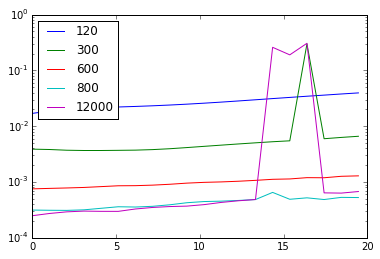

In [217]:
#plots difference in surface energy for different number of cells compared to 1200 cells. 
for ncells in [120,300,600,800,12000]:
    vn = df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==ncells)]
    plt.semilogy(vn["scaled_galvani_potential"],abs(v1200interp(vn["scaled_galvani_potential"])-vn["surface_energy"]),label="{}".format(ncells))
plt.legend(loc="upper left")

In [218]:
from scipy.interpolate import interp1d
v1200interp = interp1d(v1200["scaled_galvani_potential"],v1200["surface_charge"])

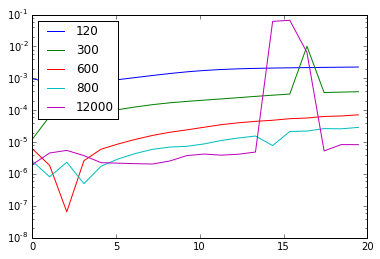

In [219]:
#plots difference in surface charge for different number of cells compared to 1200
for ncells in [120,300,600,800,12000]:
    vn = df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==ncells)]
    plt.semilogy(vn["scaled_galvani_potential"],abs(v1200interp(vn["scaled_galvani_potential"])-vn["surface_charge"]),label="{}".format(ncells))
plt.legend(loc="upper left")

In [ ]:
#plots diffcap for same concentration at different cell size
for ncells in [120,300,600,800]:
    vn = df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==ncells)]
    diffcap = np.gradient(vn["scaled_galvani_potential"],vn["surface_charge"])
    plt.plot(diffcap,label="{}".format(ncells))
plt.legend(loc="upper left")

In [75]:
vn = df4[(df2["concentration"] == "0.01 mol/l")&(df2["ncells"]==1200)]
vn

IndexingError: Unalignable boolean Series key provided

In [73]:
#plots diffcap for various concentrations
for c in ["0.01 mol/l","0.10 mol/l","0.25 mol/l","1.00 mol/l","10.0 mol/l"]:
    vn = df4[(df2["concentration"]==c)&(df2["ncells"]==1200)]
    diffcap = np.gradient(vn["scaled_galvani_potential"],vn["surface_charge"])
    plt.plot(diffcap,label="{}".format(ncells))
plt.legend(loc="upper left")

IndexingError: Unalignable boolean Series key provided

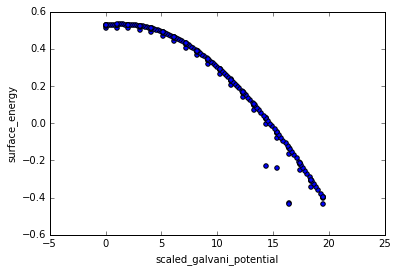

In [220]:
from matplotlib import pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for ncells in [120,300,600,800,1200,12000]:
    df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==ncells)].plot.scatter('scaled_galvani_potential', 'surface_energy',ax=ax)

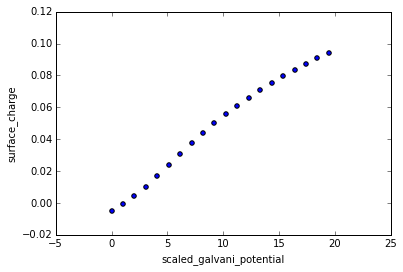

In [183]:
df4[(df2["concentration"] == "0.25 mol/l")&(df2["ncells"]==120)].plot.scatter('scaled_galvani_potential', 'surface_charge')

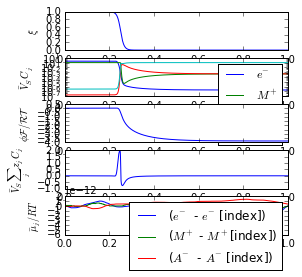

In [163]:
viewElPhF(os.path.join("Data", "17c4be819472", "output.tsv"))

In [164]:
df[df["parameters"].apply(get_concentration) == "0.25 mol/l"]

,datastore,dependencies,diff,duration,executable,input_data,input_datastore,label,launch_mode,main_file,...,reason,repeats,repository,script_arguments,stdout_stderr,tags,timestamp,user,version,concentration
0,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,85.474873,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",797e80f85b5f,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:42:03,,b10000fa55acf1b3b42367bb2b883d21b509fb5c,0.25 mol/l
1,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,91.918148,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",a684c2739841,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:39:39,,b10000fa55acf1b3b42367bb2b883d21b509fb5c,0.25 mol/l
2,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,77.845650,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",d1ff7cdc975e,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:37:34,,b10000fa55acf1b3b42367bb2b883d21b509fb5c,0.25 mol/l
3,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,78.383167,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",b1095bc3cfa1,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:35:30,,b10000fa55acf1b3b42367bb2b883d21b509fb5c,0.25 mol/l
4,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,81.828222,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",f7e68a04e51b,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:33:24,,b10000fa55acf1b3b42367bb2b883d21b509fb5c,0.25 mol/l
5,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,83.779062,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",11967549df84,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:30:34,,b10000fa55acf1b3b42367bb2b883d21b509fb5c,0.25 mol/l
6,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'IPython', u'module': u'python', u...",diff --git a/analyze.ipynb b/analyze.ipynb\nin...,82.908216,{u'path': u'/data/ame2/miniconda/envs/fipy/bin...,[],"{u'type': u'FileSystemDataStore', u'parameters...",51c963bda3b7,"{u'type': u'SerialLaunchMode', u'parameters': ...",elphf0226.py,...,,None,"{u'url': u'/data/ame2/diffcap', u'type': u'Git...",<parameters>,L = 3.2 nm\nbarrier 145.295286758\n$e^-$ 1.999...,[],2016-07-09 05:28

In [253]:
time = df2[(df2["concentration"] == "0.25 mol/l")&(df2["galvani_potential"]=="0.5 V")]

In [254]:
time

,concentration,galvani_potential,ncells,outer_sweeps,relaxation,sumatra_label
duration,,,,,,
285.804225,0.25 mol/l,0.5 V,12000,10,1,7917bd4e77a0
85.474873,0.25 mol/l,0.5 V,120,10,1,797e80f85b5f
101.603450,0.25 mol/l,0.5 V,300,10,1,ee37a02bdead
83.267868,0.25 mol/l,0.5 V,600,10,1,2f642a03acc6
175.452215,0.25 mol/l,0.5 V,800,10,1,8da60444a189
85.520260,0.25 mol/l,0.5 V,1200,10,1,c7278979f934
